# Thư viện sử dụng

In [41]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#  Check khoảng cách giữa các điểm 
def is_too_close(new_point, existing_points, min_distance):
    for point in existing_points:
        dist = np.sqrt((new_point[0] - point[0]) ** 2 + (new_point[1] - point[1]) ** 2)
        if dist < min_distance:
            return True
    return False

# Counting


*cv2.TM_CCOEFF_NORMED*
    - thước đo để so sánh độ tương đồng ở các tỷ lệ khác nhau. Nếu sử dụng phương pháp không chuẩn hóa như cv2.TM_CCORR, điểm số sẽ phụ thuộc vào số lượng pixel. 

In [43]:
# Hàm đếm đối tượng bằng template matching
def counting(image, template, THRESHOLD, min_distance, font_scale):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    w, h = template.shape[1], template.shape[0]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    
    loc = np.where(res >= THRESHOLD)
    detected_points = []
    
    # Lọc và đánh dấu đối tượng
    for idx, (y, x) in enumerate(zip(loc[0], loc[1])):
        # Kiểm tra khoảng cách với các điểm đã phát hiện
        if not is_too_close((x, y), detected_points, min_distance):
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Thêm số thứ tự
            cv2.putText(image, str(len(detected_points) + 1), (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)
            detected_points.append((x, y)) # Lưu tọa độ đã phát hiện
    

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(detected_points)} objects")
    plt.show()

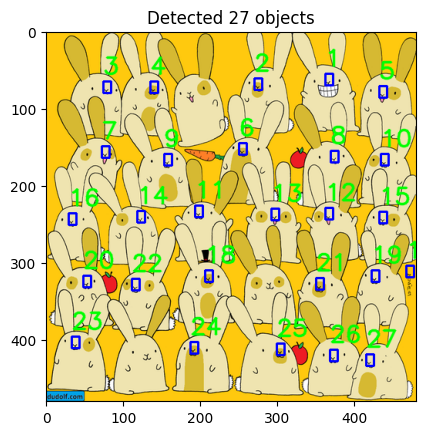

In [44]:
# Load images
# Template 1
image = cv2.imread('Counting/rabbit2.png')
template1 = cv2.imread('Counting/rabbit2_template1.jpg')

counting(image, template1, THRESHOLD=0.62, min_distance=32, font_scale=1)


# Áp dụng Multi-Scale Template Matching

In [48]:
# Hàm đếm đối tượng bằng Multi-Scale Template Matching
def counting2(image, template, THRESHOLD, min_distance=20, font_scale=1.0):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    detected_points = []
    h, w = template.shape

    # Thử nhiều kích thước template (Multi-Scale)
    for scale in np.linspace(0.5, 1.5, 10):  # Từ 50% đến 150% kích thước gốc
        resized_template = cv2.resize(template, None, fx=scale, fy=scale)
        th, tw = resized_template.shape

        # Thực hiện template matching
        res = cv2.matchTemplate(img_gray, resized_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= THRESHOLD)

        # Lọc và đánh dấu đối tượng
        for y, x in zip(loc[0], loc[1]):
            if not is_too_close((x, y), detected_points, min_distance):
                cv2.rectangle(image, (x, y), (x + tw, y + th), (255, 0, 0), 2)
                cv2.putText(image, str(len(detected_points) + 1), (x, y - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)
                detected_points.append((x, y))

    # Hiển thị ảnh với các đối tượng được phát hiện
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(detected_points)} objects")
    plt.show()

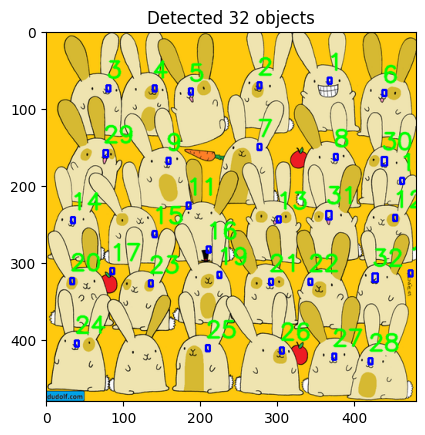

In [49]:
# Load images
# Template
image = cv2.imread('Counting/rabbit2.png')
template1 = cv2.imread('Counting/rabbit2_template1.jpg')

counting2(image, template1, THRESHOLD=0.75, min_distance=32, font_scale=1)


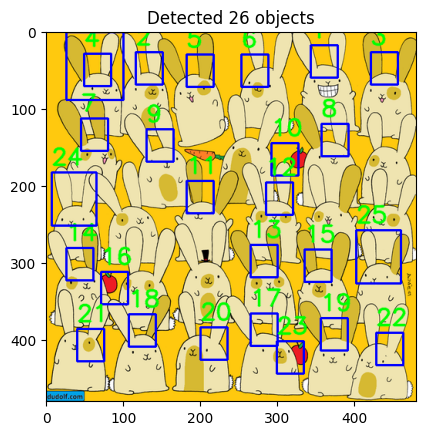

In [50]:
# Load images
# Template
image = cv2.imread('Counting/rabbit2.png')
template1 = cv2.imread('Counting/rabbit2_template3.png')

counting2(image, template1, THRESHOLD=0.25, min_distance=35, font_scale=1)


# Sử dụng TM_SQDIFF_NORMED thay vì TM_CCOEFF_NORMED

In [ ]:
def counting3(image, template, THRESHOLD, min_distance=20, font_scale=1.0):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    w, h = template_gray.shape[1], template_gray.shape[0]
    
    # Sử dụng TM_SQDIFF_NORMED thay vì TM_CCOEFF_NORMED
    res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_SQDIFF_NORMED)
    

    loc = np.where(res <= THRESHOLD)
    
    detected_points = []
    
    # Lọc và đánh dấu đối tượng
    for idx, (y, x) in enumerate(zip(loc[0], loc[1])):
        # Kiểm tra khoảng cách với các điểm đã phát hiện
        if not is_too_close((x, y), detected_points, min_distance):
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Thêm số thứ tự
            cv2.putText(image, str(len(detected_points) + 1), (x, y - 10), 
                       cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)
            detected_points.append((x, y))  # Lưu tọa độ đã phát hiện
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(detected_points)} objects (TM_SQDIFF_NORMED)")
    plt.show()

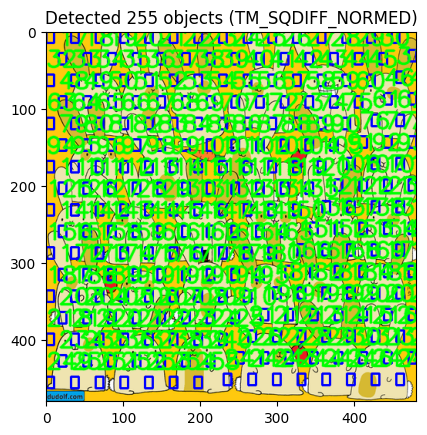

In [ ]:
# Load images
# Template
image = cv2.imread('Counting/rabbit2.png')
template1 = cv2.imread('Counting/rabbit2_template1.jpg')
# Với TM_SQDIFF_NORMED, giá trị càng nhỏ càng khớp tốt
counting3(image, template1, THRESHOLD=0.005, min_distance=32, font_scale=1)


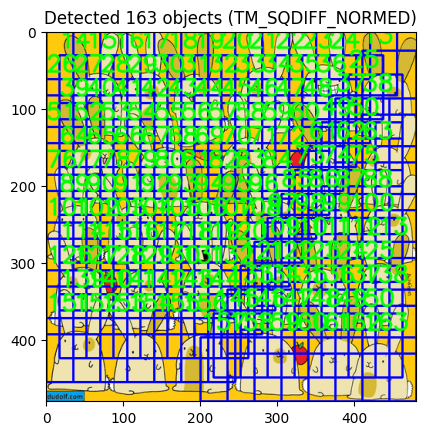

In [64]:
# Load images
# Template
image = cv2.imread('Counting/rabbit2.png')
template3 = cv2.imread('Counting/rabbit2_template3.png')

counting3(image, template3, THRESHOLD=0.05, min_distance=35, font_scale=1)
